## STUDENT PERFORMANCE INDICATOR

### Life Cycle of Machine Learning Project
- Understanding the problem statement
- Data Collection
- Data checks to perform
- Exploratory Data Analysis
- Data pre-processing
- Model training
- Choose the best model

### 1)Problem Statement
- This project understands how the students performance(test scores) is affected by other factors like Gender, Ethnicity,Parental level of education, Lunch and Test preparation course.

### 2) Data Collection
- Data source-https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 rows and 1000 columns.

### 2.1 Import Data and required packages

#### Import Pandas,Numpy,Seaborn, Matplotlib and Warnings library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



### Import CSV data as Pandas DataFrame

In [3]:
df=pd.read_csv('data/stud.csv')

#### Show top 5 records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [6]:
df.shape

(1000, 8)

The data consists of 8 rows and 1000 columns.

### 2.2 Dataset Information
- Gender :sex of the students->  Male or Female
- race_ethnicity:ethinicty of students (Group A,B,C,D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

#### 3 Data Checks to perform
- Check missing values
- Check duplicates
- Check data type
- check the number of the unique value in each column
- Check the statistics of the datatype
- Check various categories present in different categorical column

3.1 Check the missing values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset.

#### 3.2 Check Duplicates

In [8]:
df.duplicated().sum()

0

THere are no duplicate values in the dataset.

#### 3.3 Check Datatypes

In [10]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check the number of unique values in each column

In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check the statistics of the dataset

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From the above description of numerical data, all means are very close to each other-between 66 and 69.16
- All the standard deviations are also close between 14.6 and 15.19
- While there is minimum score 0 for math,for writing minimum is much higher=10 and for reading minimum score is 17.

#### Exploring Data

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
print("Categories in the 'gender' variable: ",end=" ")
print(df["gender"].unique())
print("Categories in the 'race_ethnicity' variable: ",end=" ")
print(df["race_ethnicity"].unique())
print("Categories in the 'parental_level_of_education' variable: ",end=" ")
print(df["parental_level_of_education"].unique())
print("Categories in the 'lunch' variable: ",end=" ")
print(df["lunch"].unique())
print("Categories in the 'test_preparation_course' variable: ",end=" ")
print(df["test_preparation_course"].unique())



Categories in the 'gender' variable:  ['female' 'male']
Categories in the 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in the 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in the 'lunch' variable:  ['standard' 'free/reduced']
Categories in the 'test_preparation_course' variable:  ['none' 'completed']


In [25]:
# define numerical and categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']
# print columns
print('We have {} numerical features:{}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features:{}'.format(len(categorical_features),categorical_features))

We have 3 numerical features:['math_score', 'reading_score', 'writing_score']
We have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.8 Adding columns for "Total score" and "Average"

In [26]:
df['total score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [29]:
reading_full = df[df['reading_score'] == 100]['average'].count()
math_full=df[df['math_score'] == 100]['average'].count()
writing_full=df[df['writing_score'] == 100]['average'].count()

print(f'Number of students with full marks in reading:{reading_full}')
print(f'Number of students with full marks in math:{math_full}')
print(f'Number of students with full marks in writing:{writing_full}')



Number of students with full marks in reading:17
Number of students with full marks in math:7
Number of students with full marks in writing:14


In [30]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 in reading:{reading_less_20 }')
print(f'Number of students with less than 20 in writing:{writing_less_20 }')
print(f'Number of students with less than 20 in math:{math_less_20 }')


Number of students with less than 20 in reading:1
Number of students with less than 20 in writing:3
Number of students with less than 20 in math:4


#### Insights
- From the above data students perform worst in maths and best in reading.

### Exploring Data (Visualization)
#### 4.1 Visualize avearge score distribution to make some conclusion
- Histogram
- Kernel Distribution Function(KDE)

#### 4.1.1 Histogram and KDE

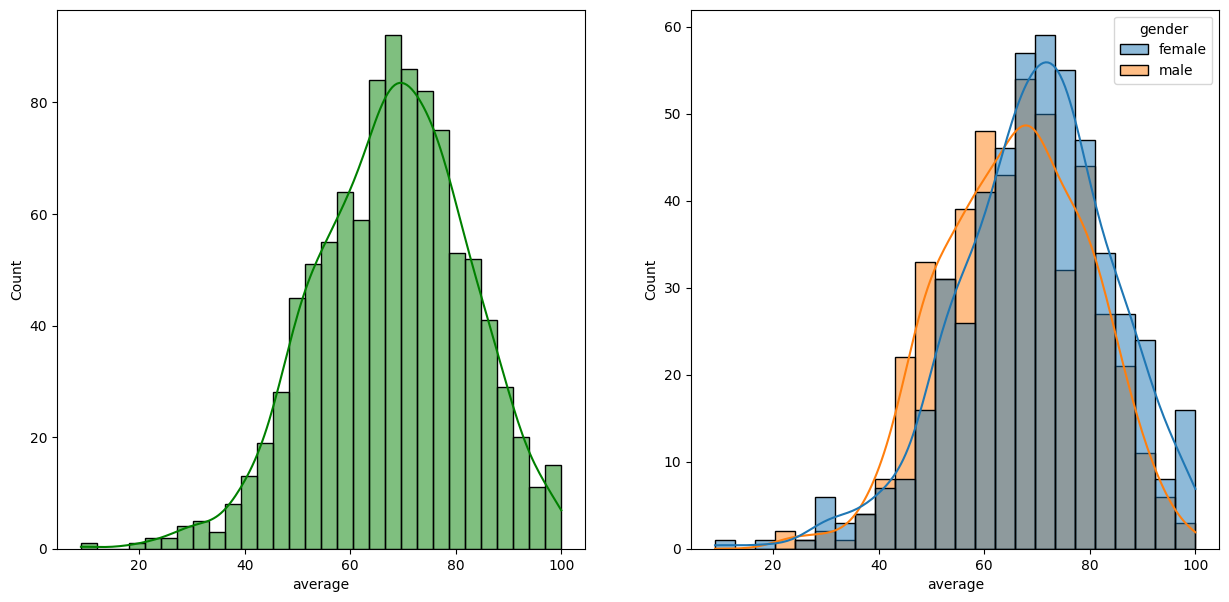

In [37]:
fig, axs=plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()


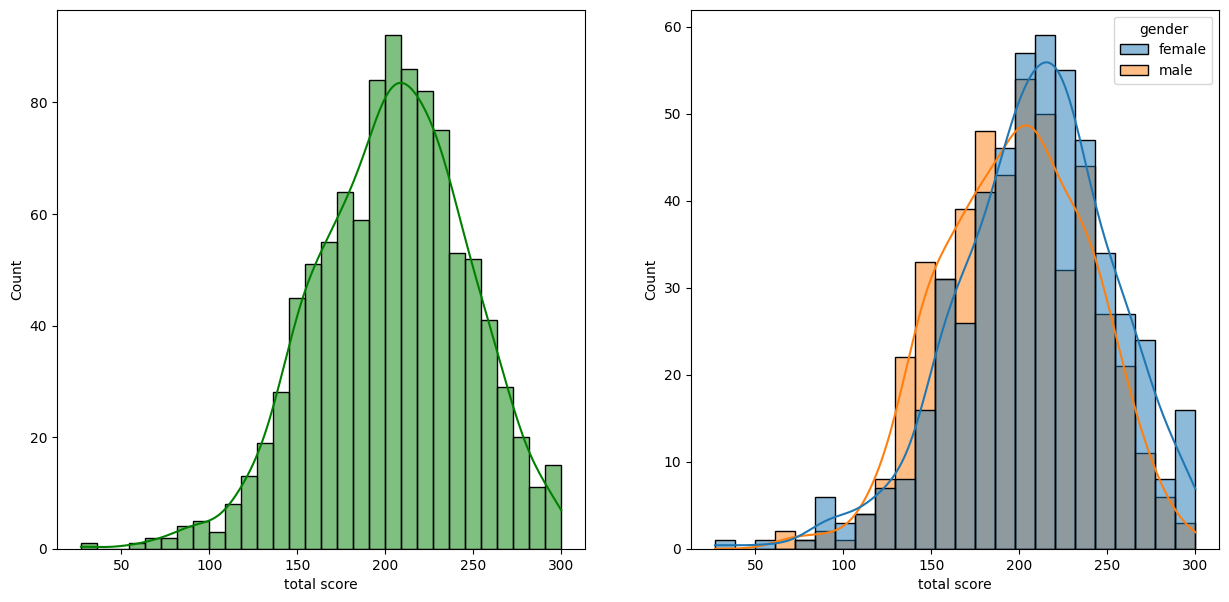

In [38]:
fig, axs=plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#### Insights
- Female students tend to perform well than male students.

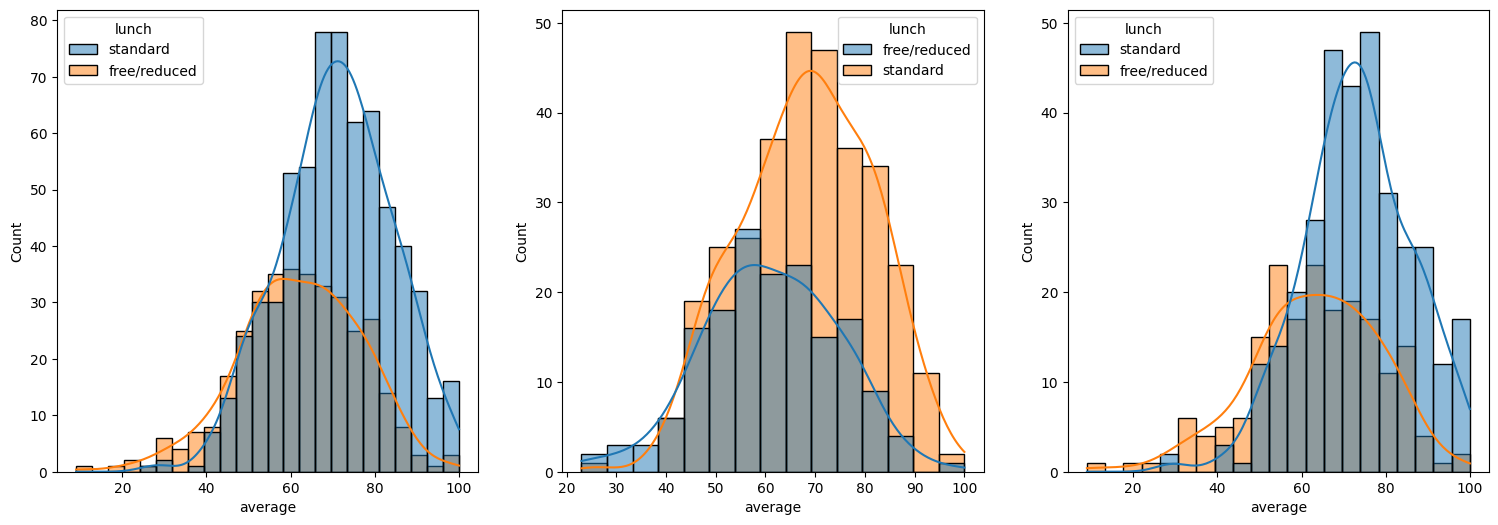

In [39]:
fig, axs=plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,color='g',hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.show()

#### Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps well in exams be it a male or female.

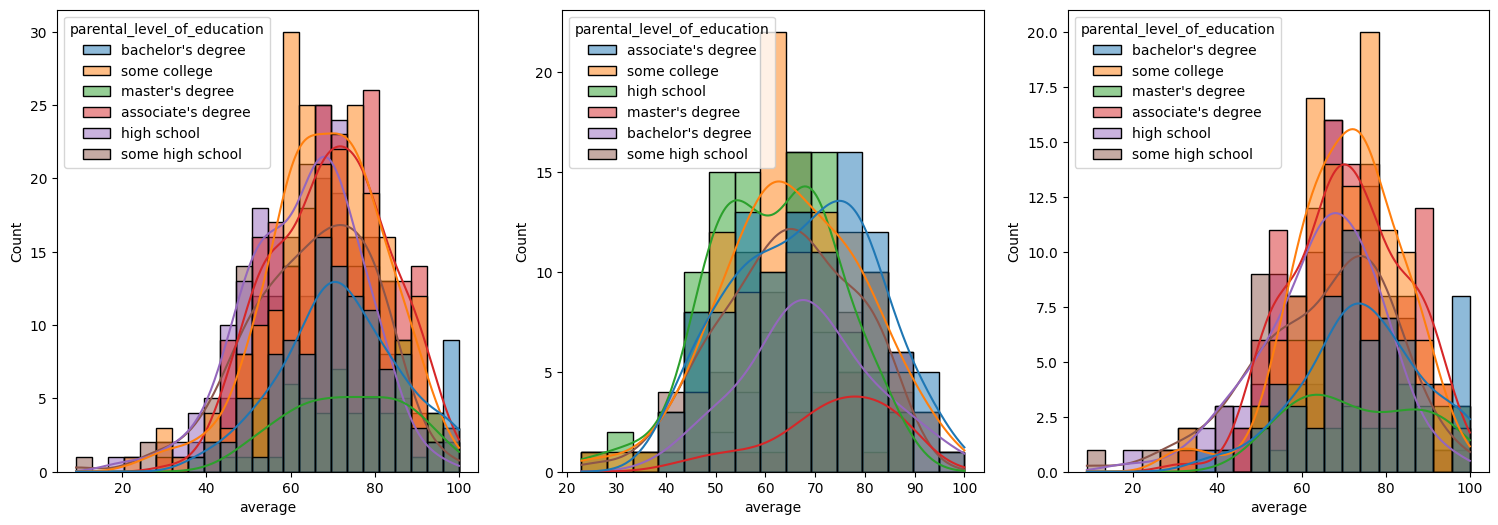

In [43]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#### Insights
- In general parent's education won't help student to perform well in exam.
- 2nd plot shows that parents whose education is of associate degree or masters degree, their male child performs well.
- 3rd plot we can see there is no effort of parents education on female students.

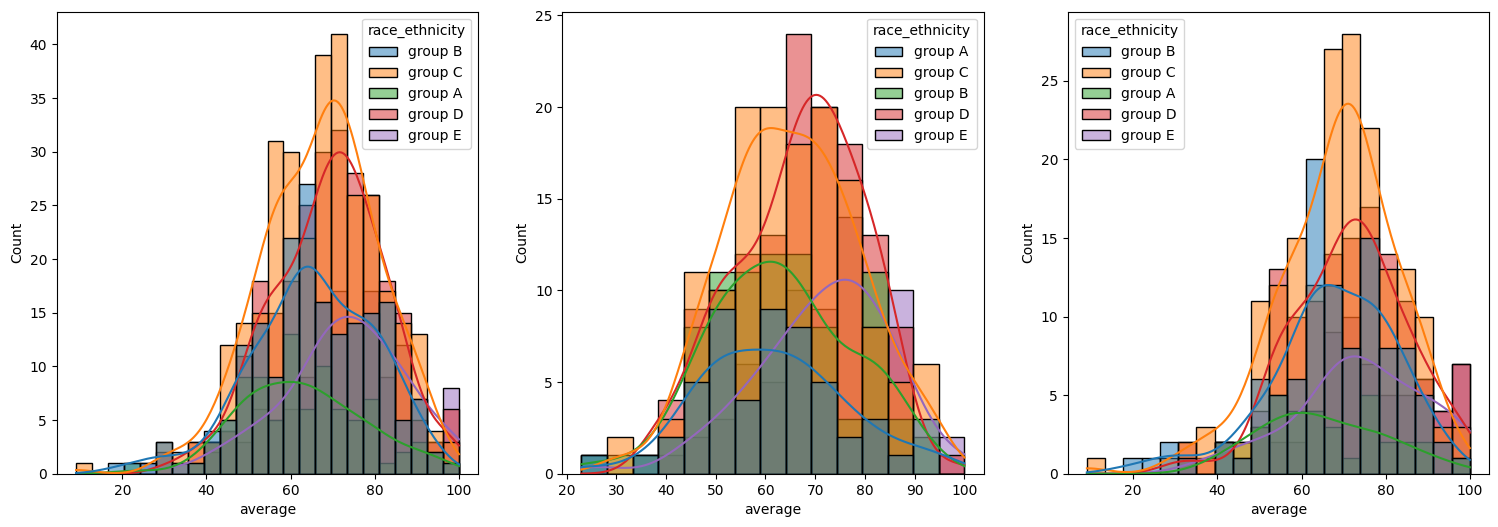

In [44]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#### Insights 
- Students of group A and group B tends to perform poorly in exam.
- Students of Group A and Group B tends to perform poorly in exam irrespective of whether they are male or female.

#### 4.2 Maximum score of students in all three subjects

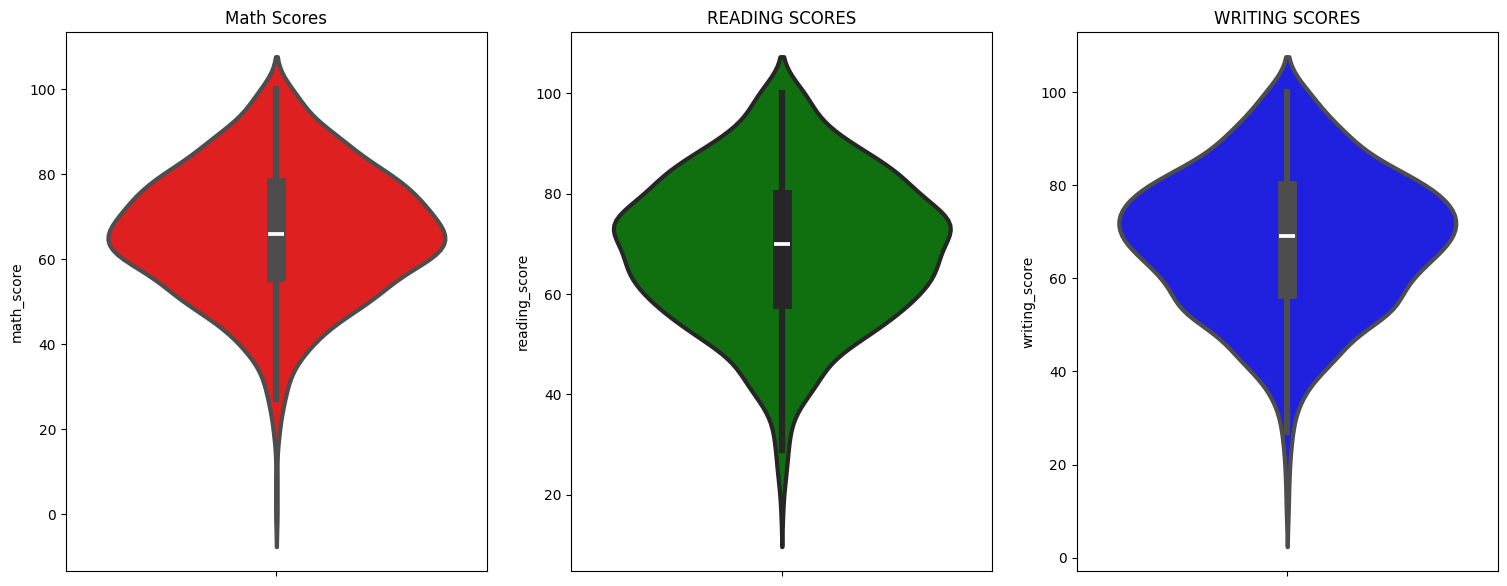

In [48]:
plt.figure(figsize=(25,7))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()


#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading nad writing most of them score from 50-80.

#### Multivariate Analysis using pieplot

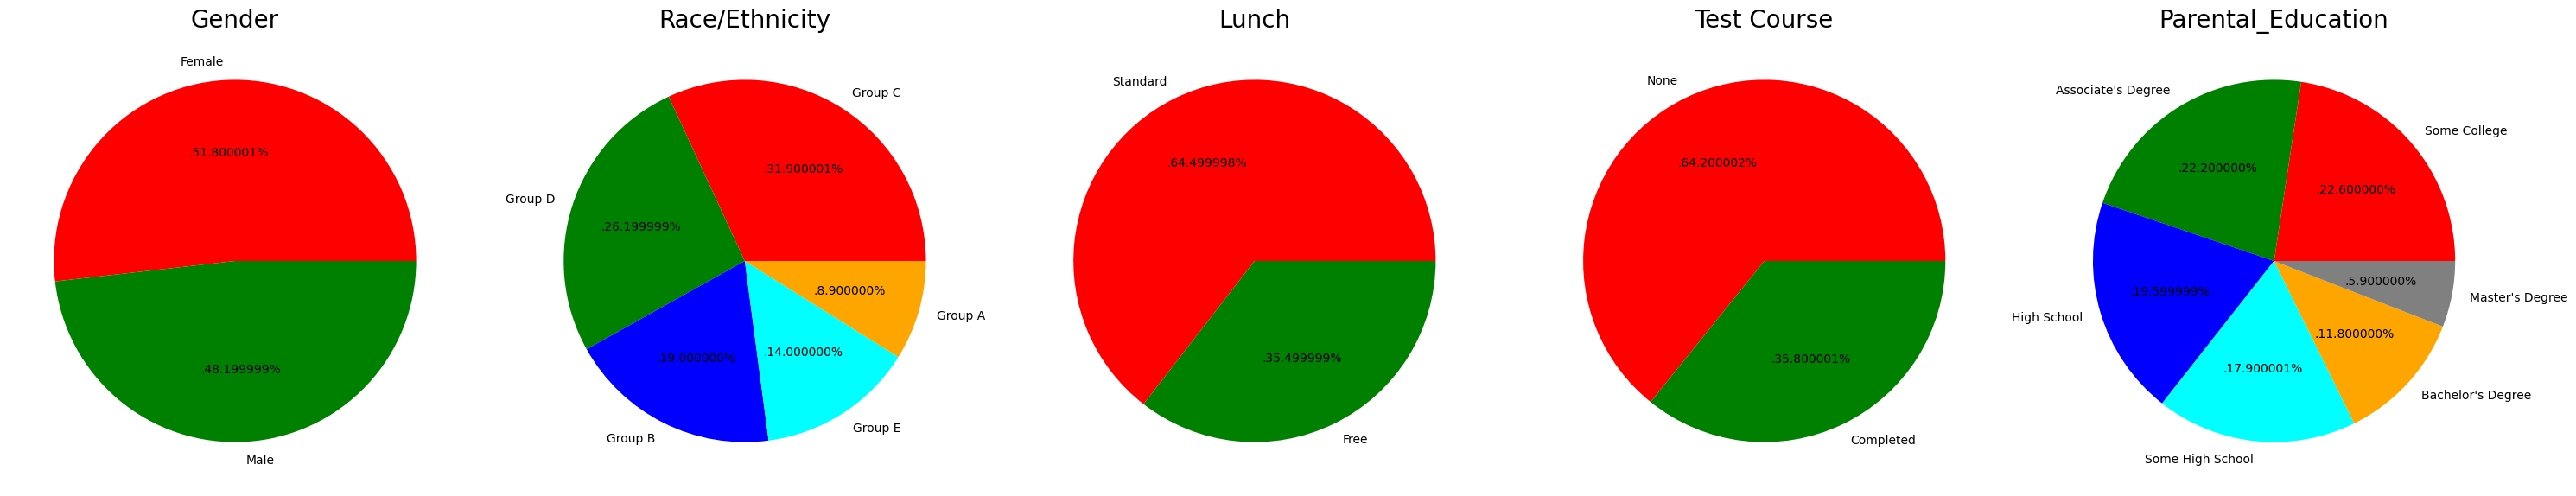

In [50]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights 
- Number of male and female is almost equal.
- Number of students are greater in group C.
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 Gender Column
- How is the distribution of gender?
- Is the gender has impact on student's performance?

#### Univariate Analysis(How is the distribution of gender?)

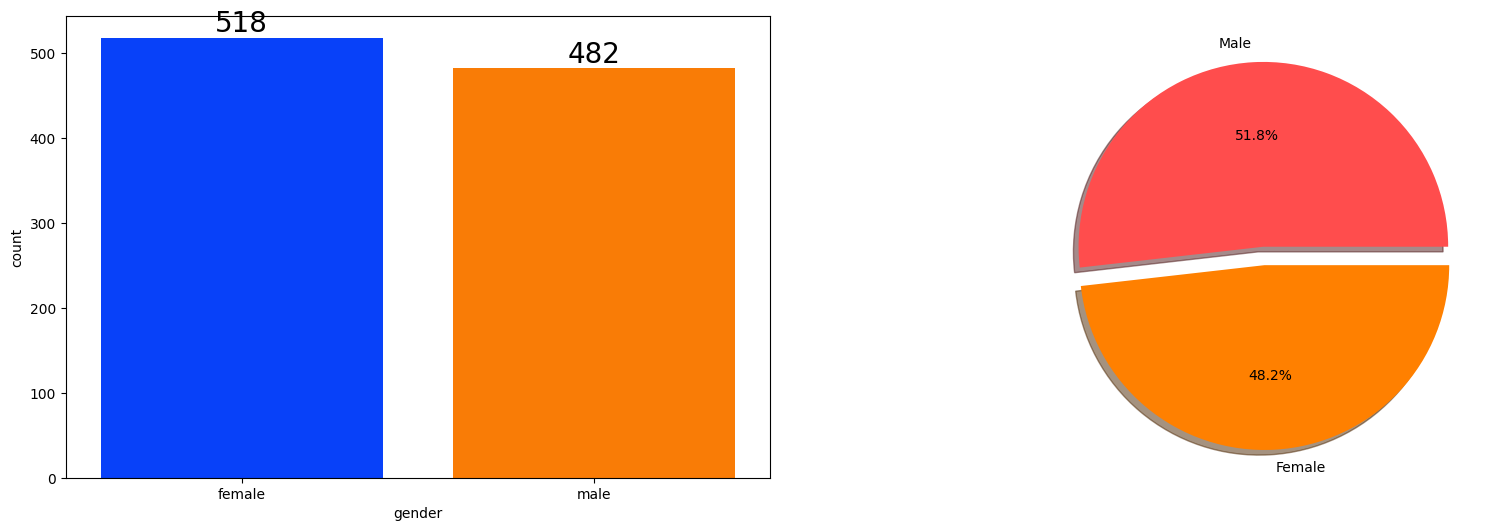

In [53]:
f,ax=plt.subplots(1,2,figsize=(20,6))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
- Gender has balanced data with female students are 518(48.2%) and make students 482(51.8%).

#### Bivariate Analysis( Is Gender has any impact on students performance)


In [68]:
numeric_df = df.select_dtypes(include=[np.number])
gender_group = numeric_df.groupby(df['gender']).mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


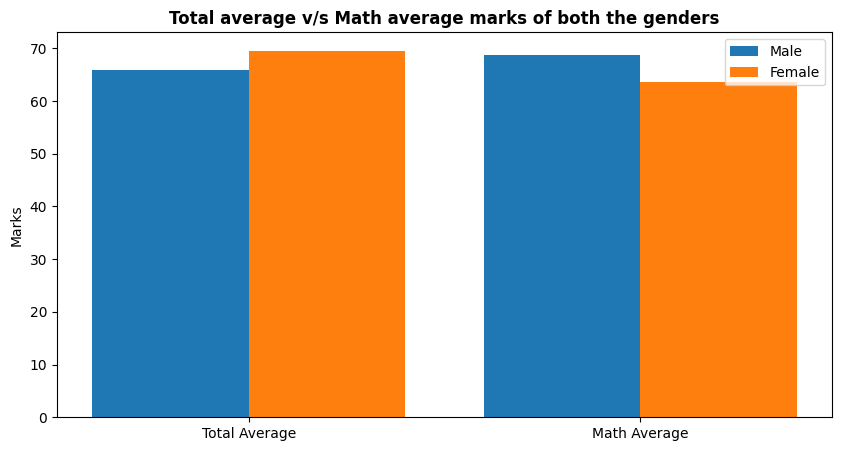

In [71]:
plt.figure(figsize=(10, 5))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
- On an average female scores more than males
- But male scores more than female on an average in maths.

#### 4.4.2 Race/Ethnicity Column
- How is the group wise distribution?
- Is race/ethinicity has any impact on students performance?


#### UNIVARIATE ANALYSIS( How is the group wise distribution)

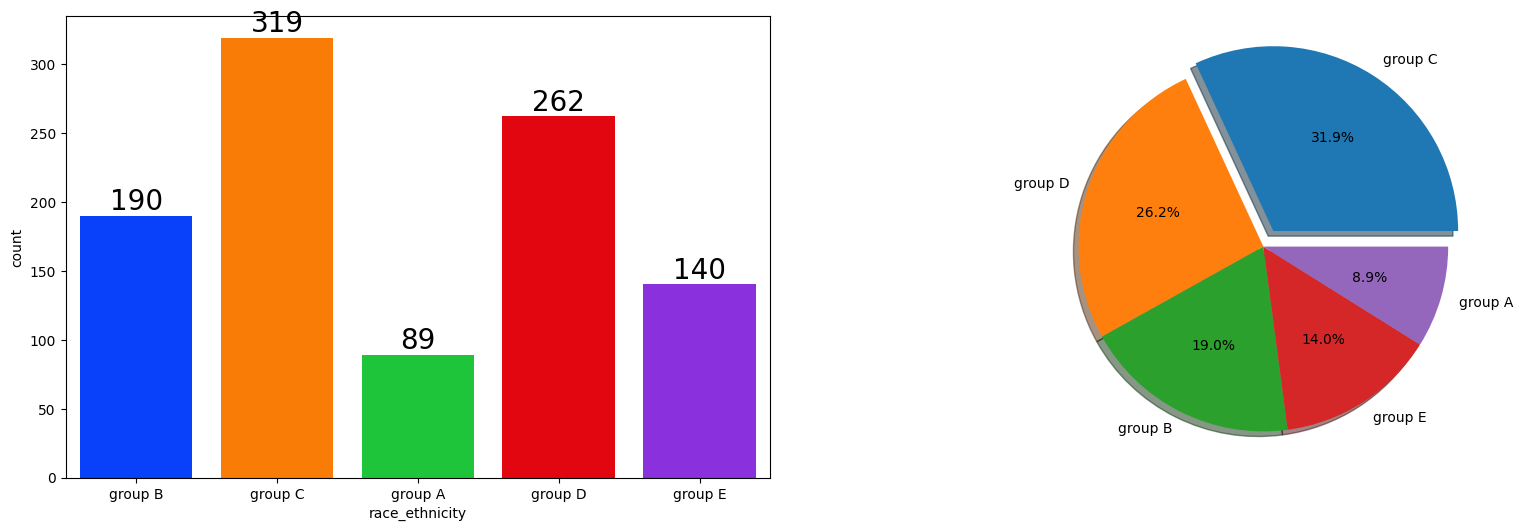

In [75]:
f,ax=plt.subplots(1,2,figsize=(20,6))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x= df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### BIVARIATE ANALYSIS(Is race/ethnicity has any impact on student performance?)

In [76]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,6))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_


In [ ]:
 Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)